In [1]:
import pickle
import numpy as np
import pandas as pd
from time import time
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

random_state = 2020
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

In [2]:
with open('../DataWrangling/df_features_train.pickle', 'rb') as f:
    df_train = pickle.load(f)
    
print("Train shape is:", df_train.shape)
display(df_train.head())

Train shape is: (19012, 167)


,harmonic,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,contrast_chroma_3,contrast_chroma_4,contrast_chroma_5,contrast_chroma_6,contrast_chroma_7,contrast_chroma_8,contrast_chroma_9,contrast_chroma_10,contrast_chroma_11,targets
bass_synthetic_100-073-025,0,-459.621887,60.604553,15.707026,-0.791278,-13.116416,-41.788025,-63.405979,-58.565708,-28.426939,...,0.171801,0.009984,0.005906,0.007431,0.008824,0.011528,0.007292,0.007329,0.206453,0
bass_synthetic_019-103-075,0,-579.954041,3.348595,0.447090,0.397642,0.574816,0.466731,0.322731,0.171821,0.178293,...,0.032572,0.034395,0.093217,0.022438,0.064349,0.047141,0.008865,0.052626,0.038116,0
bass_synthetic_003-033-127,1,-275.393677,126.373802,-30.129364,36.144222,-5.314821,19.216272,0.425906,5.046715,4.372057,...,0.145444,0.258658,0.118536,0.031173,0.126935,0.371510,0.590870,0.405639,0.116591,0
bass_electronic_019-059-127,1,-495.478546,64.959259,22.378494,10.836192,1.621737,-4.112292,-8.164826,-3.958625,-4.771589,...,0.055345,0.048271,0.007574,0.030186,0.064552,0.030623,0.054456,0.483882,0.608856,0
bass_synthetic_094-030-025,0,-427.515625,62.093185,56.552708,48.755554,40.263329,32.399586,25.919132,20.958433,17.209757,...,0.049489,0.067749,0.506897,0.633417,0.458564,0.032357,0.061549,0.020015,0.011788,0


In [3]:
with open('../DataWrangling/df_features_valid.pickle', 'rb') as f:
    df_test = pickle.load(f)

print("Valid shape is:", df_test.shape)
display(df_test.head())

Valid shape is: (12678, 167)


,harmonic,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,contrast_chroma_3,contrast_chroma_4,contrast_chroma_5,contrast_chroma_6,contrast_chroma_7,contrast_chroma_8,contrast_chroma_9,contrast_chroma_10,contrast_chroma_11,targets
keyboard_acoustic_004-060-025,1,-475.059967,57.904964,45.397789,33.654259,23.840649,16.517649,11.215567,6.625139,2.417870,...,0.073346,0.131672,0.167997,0.161846,0.113347,0.113519,0.079041,0.068088,0.413653,4
bass_synthetic_033-050-100,1,-423.117157,69.200577,45.416584,22.664520,8.433683,1.113607,-2.524592,-3.295073,-2.176944,...,0.455566,0.094304,0.046154,0.000859,0.078811,0.052517,0.089218,0.088820,0.051163,0
bass_synthetic_009-052-050,0,-149.234711,53.307137,-50.052933,72.835632,-48.004280,37.524715,-38.533348,19.412514,-23.413315,...,0.469621,0.677325,0.452823,0.001909,0.000000,0.000000,0.000000,0.134581,0.247741,0
keyboard_electronic_003-064-127,0,-499.936157,47.047512,13.790718,8.749691,3.253123,-1.371571,-5.380596,-7.059535,-8.347107,...,0.405893,0.545605,0.458490,0.088808,0.154312,0.144893,0.064207,0.038475,0.023381,4
bass_synthetic_034-030-050,1,-411.420532,67.550209,39.091339,55.981926,24.597698,26.598867,12.040562,12.276508,6.266153,...,0.076811,0.076412,0.359199,0.504694,0.410889,0.082257,0.003461,0.082358,0.065493,0


In [4]:
## Split X & Y
X_train = df_train.drop(labels=['targets'], axis=1)
y_train = df_train['targets']

X_test = df_test.drop(labels=['targets'], axis=1)
y_test = df_test['targets']

In [8]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None, cmap=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)

    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    
    ax.figure.colorbar(im, ax=ax)

    
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),

           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')


    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

    return ax

In [9]:
class_names=np.array(['bass', 'brass', 'flute', 'guitar', 
             'keyboard', 'mallet', 'organ', 'reed', 
             'string', 'synth_lead', 'vocal'])

# Random Forests

In [11]:
## Instantiate RF
clf_Rf =RandomForestClassifier(n_estimators=20, max_depth=50, warm_start=True)

In [12]:
clf_Rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=True)

In [13]:
y_pred_RF = clf_Rf.predict(X_test)

In [14]:
accuracy_RF = np.mean(y_pred_RF == y_test)
print("The accuracy of Random Forest is {0:.2%}".format(accuracy_RF))

The accuracy of Random Forest is 54.20%


Normalized confusion matrix


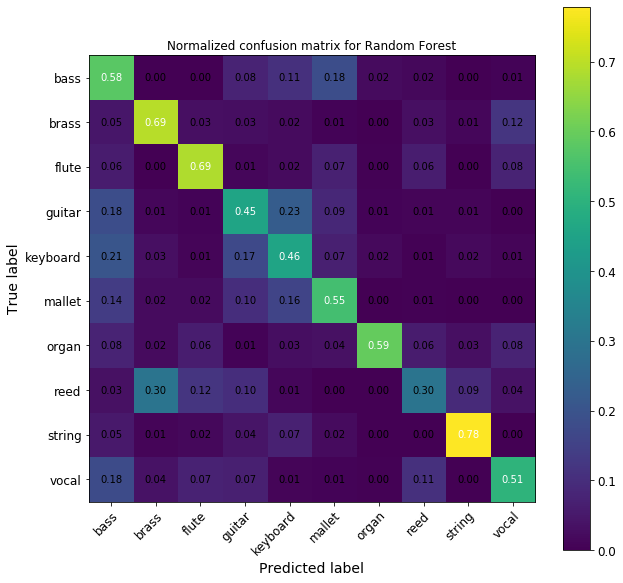

In [15]:
plot_confusion_matrix(y_test, y_pred_RF, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for Random Forest')
plt.show();

## Grid Search

In [16]:
param_dist = {"n_estimators" : [20, 40, 60],
              "max_depth": [10, 20, 30, 40],
              "max_features": sp_randint(4, 10),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [17]:
## Instantiate RF_CV
clf_RF_CV=RandomForestClassifier()

## Set n
n_iter_search = 10

random_search_RF = RandomizedSearchCV(clf_RF_CV, param_distributions=param_dist, n_iter=n_iter_search, cv=5)

random_search_RF.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [18]:
display(random_search_RF.best_estimator_)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=40, max_features=9,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
y_pred_RF_random = random_search_RF.predict(X_test)
accuracy_RF_random = np.mean(y_pred_RF_random == y_test)
print("The accuracy of Random Forest is {0:.2%}".format(accuracy_RF_random))

The accuracy of Random Forest is 57.57%


Normalized confusion matrix


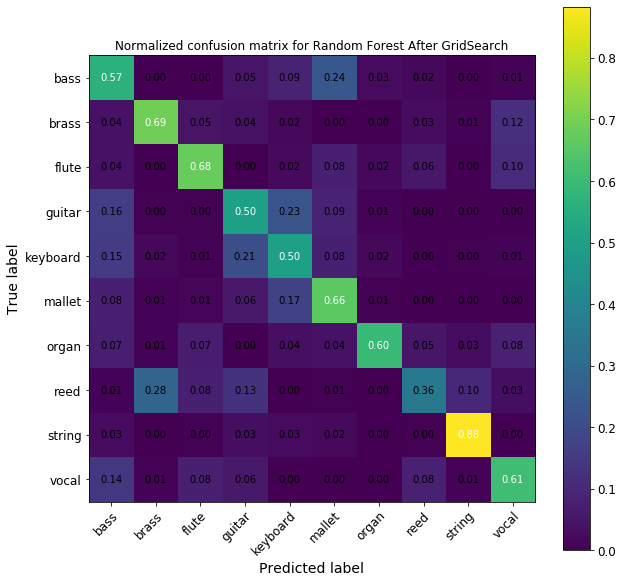

In [20]:
plot_confusion_matrix(y_test, y_pred_RF_random, classes=class_names, normalize=True, title='Normalized confusion matrix for Random Forest After GridSearch')
plt.show();